# Book Recommendation System

During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such web services, recommender systems have taken more and more place in our lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to users the right contents, matching their preferences), recommender systems are today unavoidable in our daily online journeys.

In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries). Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors. The main objective is to create a book recommendation system for users.

# Content

## The Book-Crossing dataset comprises three files

**<li>Users: </li>**
Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values.

**<li>Books: </li>**
Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title, Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in the case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavors (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon website.

**<li>Ratings: </li>**
Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.

-----------------------

## Importing Libraries


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings; warnings.simplefilter('ignore')

---------------------

### Book Data

In [3]:
book_data = pd.read_csv("dataset/Books.csv", low_memory=False)
book_data.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
book_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [5]:
book_data.shape

(271360, 8)

----

### Users Data

In [6]:
users_data= pd.read_csv('dataset/Users.csv', low_memory=False)
users_data.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [7]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [8]:
users_data.shape

(278858, 3)

-----------------------------

### Ratings Data

In [9]:
ratings_data = pd.read_csv("dataset/Ratings.csv", low_memory=False)
ratings_data.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [10]:
ratings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [11]:
ratings_data.shape

(1149780, 3)

----------------------

## Data Preparation (Data Cleaning and Feature Engineering)

## Checking All Data Missing Values 

In [12]:
pd.set_option('display.max_colwidth', 1)

In [13]:
print("Total books dataset of missing values: " ,book_data.isnull().sum().count())
print("Total users dataset of missing values:", users_data.isnull().sum().count())
print("Total ratings data of missing values: ", ratings_data.isnull().sum().count())

Total books dataset of missing values:  8
Total users dataset of missing values: 3
Total ratings data of missing values:  3


## Checking All Data Duplicate Values 

In [14]:
print("Total books dataset of duplicate values: ", book_data.duplicated().sum())
print("Total users dataset of duplicate values: ", users_data.duplicated().sum())
print("Total ratings dataset of duplicate values: ", ratings_data.duplicated().sum())

Total books dataset of duplicate values:  0
Total users dataset of duplicate values:  0
Total ratings dataset of duplicate values:  0


In [15]:
# nan values in particular column
book_data.loc[(book_data['Book-Author'].isnull()),: ]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
118033,0751352497,A+ Quiz Masters:01 Earth,NaN,1999,Dorling Kindersley,http://images.amazon.com/images/P/0751352497.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0751352497.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0751352497.01.LZZZZZZZ.jpg
187689,9627982032,The Credit Suisse Guide to Managing Your Personal Wealth,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/9627982032.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/9627982032.01.LZZZZZZZ.jpg


In [16]:
# nan values in particular column
book_data.loc[(book_data['Publisher'].isnull()),: ]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/193169656X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/193169656X.01.LZZZZZZZ.jpg
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/1931696993.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/1931696993.01.LZZZZZZZ.jpg


We pointed null values in 'book_author' and 'publisher' feature.

Let's look at the unique years to realize the time period as this dataset was created in 2004.

In [17]:
# getting unique value from 'year_of_publication' feature
book_data['Year-Of-Publication'].unique()

array(['2002', '2001', '1991', '1999', '2000', '1993', '1996', '1988',
       '2004', '1998', '1994', '2003', '1997', '1983', '1979', '1995',
       '1982', '1985', '1992', '1986', '1978', '1980', '1952', '1987',
       '1990', '1981', '1989', '1984', '0', '1968', '1961', '1958',
       '1974', '1976', '1971', '1977', '1975', '1965', '1941', '1970',
       '1962', '1973', '1972', '1960', '1966', '1920', '1956', '1959',
       '1953', '1951', '1942', '1963', '1964', '1969', '1954', '1950',
       '1967', '2005', '1957', '1940', '1937', '1955', '1946', '1936',
       '1930', '2011', '1925', '1948', '1943', '1947', '1945', '1923',
       '2020', '1939', '1926', '1938', '2030', '1911', '1904', '1949',
       '1932', '1928', '1929', '1927', '1931', '1914', '2050', '1934',
       '1910', '1933', '1902', '1924', '1921', '1900', '2038', '2026',
       '1944', '1917', '1901', '2010', '1908', '1906', '1935', '1806',
       '2021', '2012', '2006', 'DK Publishing Inc', 'Gallimard', '1909',
       



**Let's check at the corresponding rows in the dataframe.**

In [18]:
# Extracting and fixing mismatch in feature 'year_of_publication', 'publisher', 'book_author', 'book_title'
book_data[book_data['Year-Of-Publication'] == 'DK Publishing Inc'] 

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0789466953.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0789466953.01.LZZZZZZZ.jpg,NaN


---------------

In [19]:
# Extracting and fixing mismatch in feature 'year_of_publication', 'publisher', 'book_author', 'book_title' 
book_data[book_data['Year-Of-Publication'] == 'Gallimard']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.LZZZZZZZ.jpg,NaN


---------------

**There has to make some correction in three rows as you can see in above output. Let's fix it.**

In [20]:
book_data.loc[221678]

ISBN                   0789466953                                                                                                 
Book-Title             DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\";James Buckley"
Book-Author            2000                                                                                                       
Year-Of-Publication    DK Publishing Inc                                                                                          
Publisher              http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg                                               
Image-URL-S            http://images.amazon.com/images/P/0789466953.01.MZZZZZZZ.jpg                                               
Image-URL-M            http://images.amazon.com/images/P/0789466953.01.LZZZZZZZ.jpg                                               
Image-URL-L            NaN                                                         

In [21]:
book_data.loc[209538]

ISBN                   078946697X                                                                                          
Book-Title             DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\";Michael Teitelbaum"
Book-Author            2000                                                                                                
Year-Of-Publication    DK Publishing Inc                                                                                   
Publisher              http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg                                        
Image-URL-S            http://images.amazon.com/images/P/078946697X.01.MZZZZZZZ.jpg                                        
Image-URL-M            http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg                                        
Image-URL-L            NaN                                                                                                 
Name: 20

In [22]:
book_data.loc[220731]

ISBN                   2070426769                                                              
Book-Title             Peuple du ciel, suivi de 'Les Bergers\";Jean-Marie Gustave Le ClÃ?Â©zio"
Book-Author            2003                                                                    
Year-Of-Publication    Gallimard                                                               
Publisher              http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg            
Image-URL-S            http://images.amazon.com/images/P/2070426769.01.MZZZZZZZ.jpg            
Image-URL-M            http://images.amazon.com/images/P/2070426769.01.LZZZZZZZ.jpg            
Image-URL-L            NaN                                                                     
Name: 220731, dtype: object

------------------

-----------------------

In [23]:
book_data.loc[(book_data['Publisher'].isnull()),: ]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/193169656X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/193169656X.01.LZZZZZZZ.jpg
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/1931696993.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/1931696993.01.LZZZZZZZ.jpg


In [24]:
# replacing 'Nan' with 'No Mention'
book_data.loc[(book_data['ISBN'] == '193169656X'),'publisher'] = 'No Mention'
book_data.loc[(book_data['ISBN'] == '1931696993'),'publisher'] = 'No Mention'

In [25]:
df = pd.DataFrame(book_data)
cols = [4]
df = df[df.columns[cols]]

In [26]:
pd.set_option('display.max_columns', None)  
df.head(5)

,Publisher
0,Oxford University Press
1,HarperFlamingo Canada
2,HarperPerennial
3,Farrar Straus Giroux
4,W. W. Norton &amp; Company


In [27]:
book_data[book_data['publisher'] == 'No Mention']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/193169656X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/193169656X.01.LZZZZZZZ.jpg,No Mention
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/1931696993.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/1931696993.01.LZZZZZZZ.jpg,No Mention


-----------------------------

## Let's see now user_data dataset

In [28]:
# users_data size
print(users_data.shape)

(278858, 3)


In [29]:
# unique value in age
users_data['Age'].unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

---------------------

**There is NaN value in age. We can replace NaN with mean of 'age'.**

In [30]:
# replacing nan with average of 'age'
users_data['Age'].fillna((users_data['Age'].mean()), inplace=True)

In [31]:
users_data['Age'].unique()

array([ 34.7514337,  18.       ,  17.       ,  61.       ,  26.       ,
        14.       ,  25.       ,  19.       ,  46.       ,  55.       ,
        32.       ,  24.       ,  20.       ,  34.       ,  23.       ,
        51.       ,  31.       ,  21.       ,  44.       ,  30.       ,
        57.       ,  43.       ,  37.       ,  41.       ,  54.       ,
        42.       ,  50.       ,  39.       ,  53.       ,  47.       ,
        36.       ,  28.       ,  35.       ,  13.       ,  58.       ,
        49.       ,  38.       ,  45.       ,  62.       ,  63.       ,
        27.       ,  33.       ,  29.       ,  66.       ,  40.       ,
        15.       ,  60.       ,   0.       ,  79.       ,  22.       ,
        16.       ,  65.       ,  59.       ,  48.       ,  72.       ,
        56.       ,  67.       ,   1.       ,  80.       ,  52.       ,
        69.       ,  71.       ,  73.       ,  78.       ,   9.       ,
        64.       , 103.       , 104.       ,  12.       ,  74. 

_______________

In [32]:
# retrieving age data between 5 to 90
users_data.loc[(users_data['Age'] > 90) | (users_data['Age'] < 5)] = np.nan

In [33]:
users_data['Age'].fillna((users_data['Age'].mean()), inplace=True)

In [34]:
users_data['Age'].unique()

array([34.7514337 , 18.        , 17.        , 61.        , 26.        ,
       14.        , 25.        , 19.        , 46.        , 55.        ,
       32.        , 24.        , 20.        , 34.        , 23.        ,
       51.        , 31.        , 21.        , 44.        , 30.        ,
       57.        , 43.        , 37.        , 41.        , 54.        ,
       42.        , 50.        , 39.        , 53.        , 47.        ,
       36.        , 28.        , 35.        , 13.        , 58.        ,
       49.        , 38.        , 45.        , 62.        , 63.        ,
       27.        , 33.        , 29.        , 66.        , 40.        ,
       15.        , 60.        , 34.73485224, 79.        , 22.        ,
       16.        , 65.        , 59.        , 48.        , 72.        ,
       56.        , 67.        , 80.        , 52.        , 69.        ,
       71.        , 73.        , 78.        ,  9.        , 64.        ,
       12.        , 74.        , 75.        , 76.        , 83.  

**As we can see above we don't have any null values for age.**

------------------------

## Now let's take ratings_data dataset

In [35]:
ratings_data.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [36]:
# finding unique ISBNs from rating and book dataset
unique_ratings = ratings_data[ratings_data.ISBN.isin(book_data.ISBN)]
unique_ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149774,276704,0876044011,0
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10


In [37]:
print(ratings_data.shape)
print(unique_ratings.shape)

(1149780, 3)
(1031136, 3)


In [38]:
# unique ratings from 'book_rating' feature
unique_ratings['Book-Rating'].unique()

array([ 0,  5,  3,  6,  7,  9,  8, 10,  1,  4,  2], dtype=int64)

-----------------------------------------

## Data Visualizations

### Book_data dataset

#### Analysis no. 1 -

Which are the top Author with number of books ?

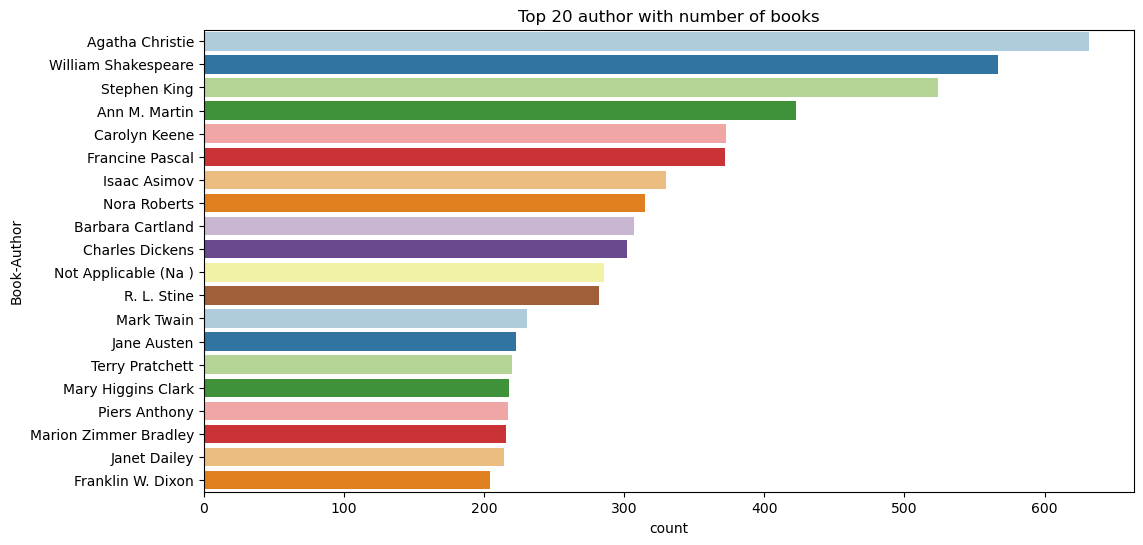

In [41]:
plt.figure(figsize=(12,6))
sns.countplot(y="Book-Author",palette = 'Paired', data=book_data,order=book_data['Book-Author'].value_counts().index[0:20])
plt.title("Top 20 author with number of books")
plt.savefig('visualizations/top_20_authors_with_numbers_of_books.png')

Agatha Christie is leading at top with more than 600 counts, followed by William Shakespeare. We can plot some hypothesis point :-

- It can happen in some possible cases that Agatha Christie is not a best Author, though Agatha Christie has most number of books as compared to others.
- William Shakespeare is one of the popular Author in the world. Still he doesn't have highest number of books. </li>
- Among all other Authors, it might happen that few of the Author might have some of the best seller books who have millions of copies been sold in world.

--------------------------------------

#### Analysis no.2 -

Which are top publishers with published books ?

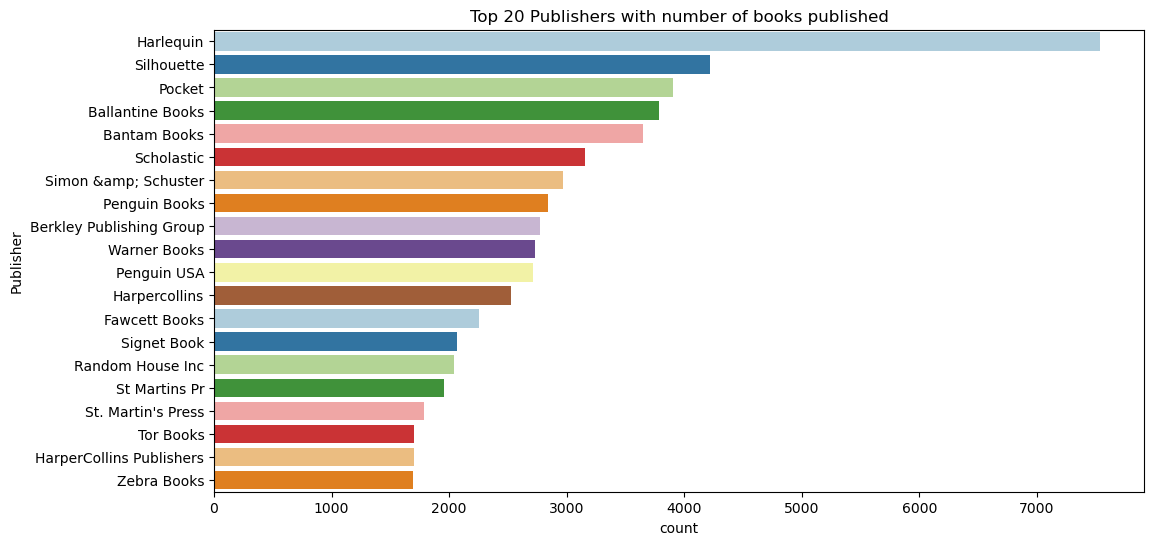

In [42]:
plt.figure(figsize=(12,6))
sns.countplot(y="Publisher",palette = 'Paired', data=book_data,order=book_data['Publisher'].value_counts().index[0:20])
plt.title("Top 20 Publishers with number of books published")
plt.savefig('visualizations/top_20_publishers.png')

Harlequin has most number of books published, followed by Silhouette. Hypothesis analysis to focus :-

- Some of the top Author's had published their books from Harlequin.
- We can observe Harlequin publiser's marking better performance than any other publishers.
- Penguin Books, Warner Books, Penguin USA, Berkely Publishing Group and many more are among popular publisher's remarking competition with Harlequin.
- Though Penguin Books Publisher has less number of books published but it might happen that only top Author's are approaching towards Penguin Books Publisher.

-----------------------

#### Analysis no.3 -

Number of Books published in yearly.

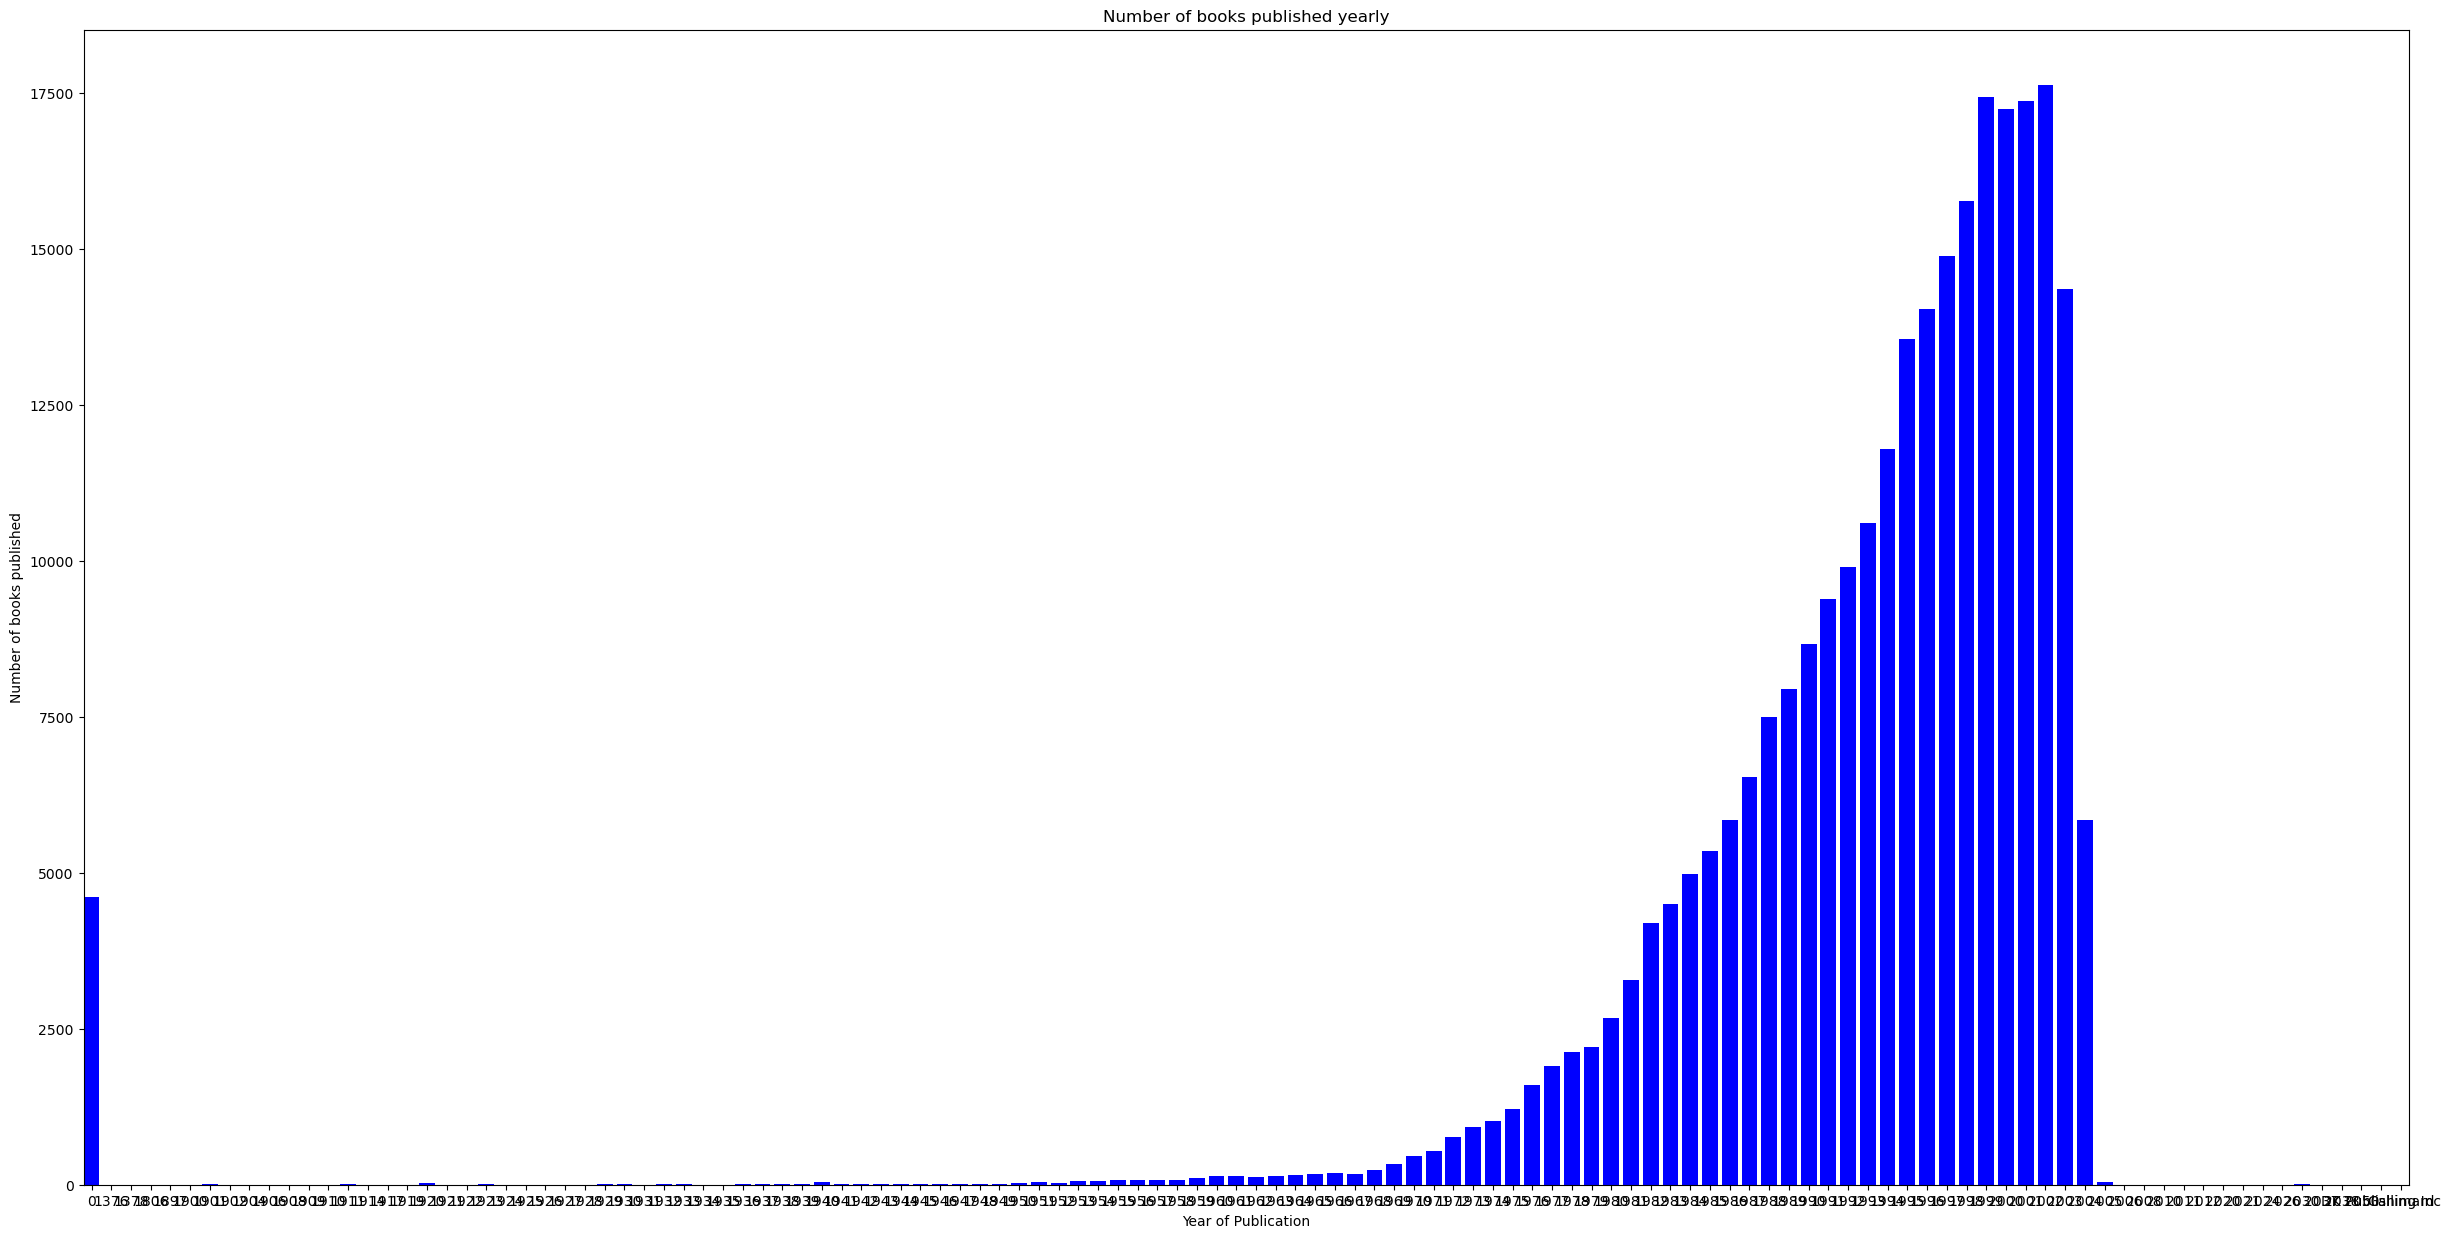

In [43]:
publications = {}
for year in book_data['Year-Of-Publication']:
    if str(year) not in publications:
        publications[str(year)] = 0
    publications[str(year)] +=1

publications = {k:v for k, v in sorted(publications.items())}

fig = plt.figure(figsize =(30, 15))
plt.bar(list(publications.keys()),list(publications.values()), color = 'blue')
plt.ylabel("Number of books published")
plt.xlabel("Year of Publication")
plt.title("Number of books published yearly")
plt.margins(x = 0)
plt.savefig('visualizations/number_of_punlisher_yealy.png')
plt.show()


---------------------

In [44]:
book_data

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg,NaN
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg,NaN
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg,NaN
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.LZZZZZZZ.jpg,NaN
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.LZZZZZZZ.jpg,NaN
...,...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0440400988.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0440400988.01.LZZZZZZZ.jpg,NaN
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0525447644.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0525447644.01.LZZZZZZZ.jpg,NaN
271357,006008667X,Lily Dale : The True Story of the Town that Talks to the Dead,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/006008667X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/006008667X.01.LZZZZZZZ.jpg,NaN
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0192126040.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0192126040.01.LZZZZZZZ.jpg,NaN


In [45]:
book_data['Year-Of-Publication'] = pd.to_numeric(book_data['Year-Of-Publication'], errors='coerce')

# Checking for 0's or NaNs in Year of Publication
zero_year = book_data[book_data['Year-Of-Publication'] == 0]['Year-Of-Publication'].count()
nan_year = book_data['Year-Of-Publication'].isnull().sum()

print(f"There are {zero_year} entries as '0', and {nan_year} NaN entries in the Year of Publication field.")

# Replace all years of zero with NaN and ensure the column name is consistent
book_data['Year-Of-Publication'].replace(0, np.nan, inplace=True)

There are 4618 entries as '0', and 3 NaN entries in the Year of Publication field.


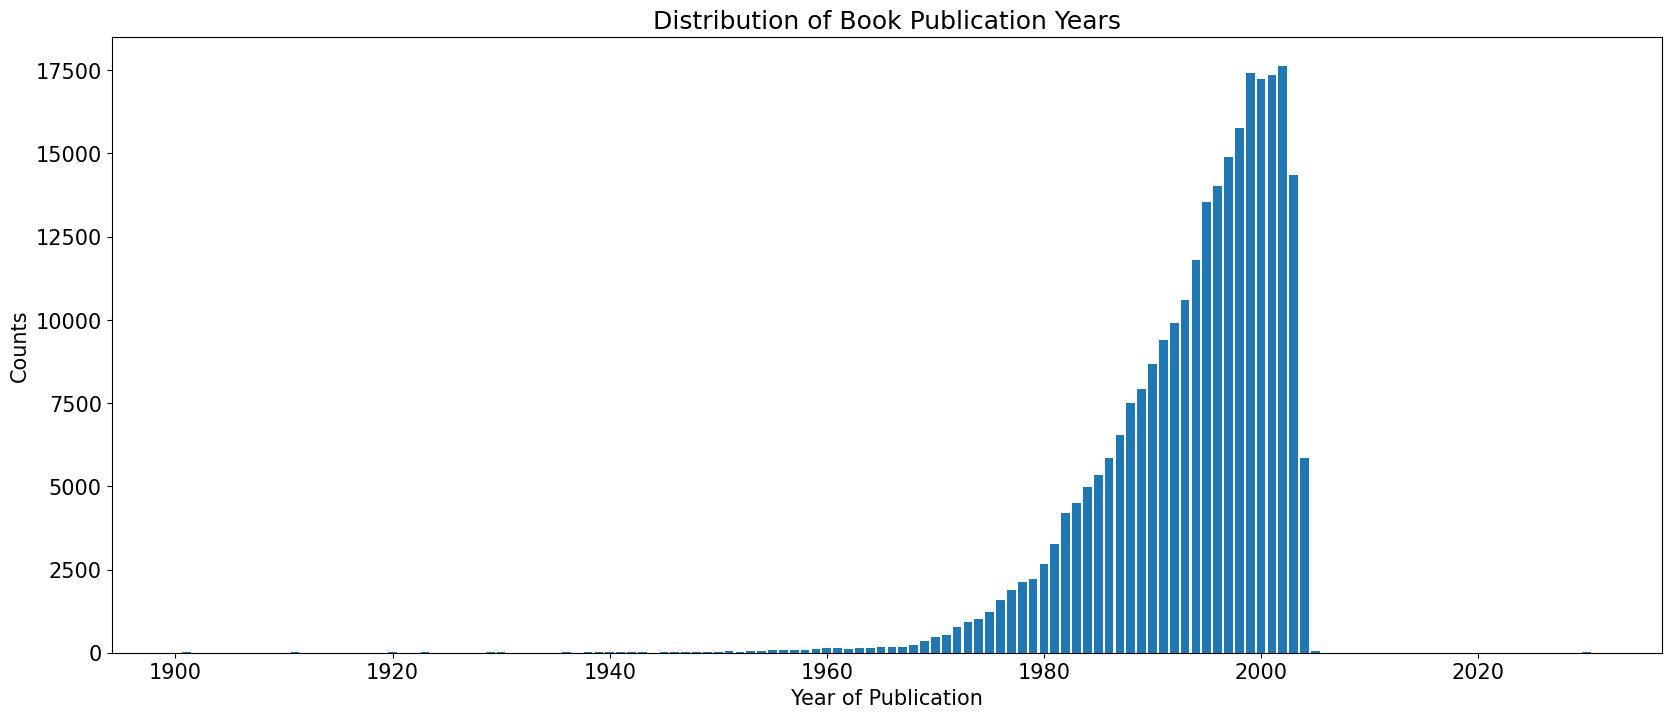

In [48]:
year = book_data['Year-Of-Publication'].value_counts().sort_index()
# Filter out years with a count of 5 or less
year = year[year > 5]
# Set up the plot with appropriate size and font size
plt.figure(figsize=(20, 8))
plt.rcParams.update({'font.size': 15})
# Create a bar plot
plt.bar(year.index, year.values)
plt.xlabel('Year of Publication')
plt.ylabel('Counts')
plt.title('Distribution of Book Publication Years')
plt.savefig('visualizations/distribution_of_book_published.png')
# Display the plot
plt.show()

So we can see publication years are somewhat between 1950 - 2005 here.The publication of books got vital when it starts emerging from 1950. We can get some hyothesis key points:-

- It might happen people starts to understand the importance of books and gradually got productivity habits in their life.
- Every user has their own taste to read books based on what particular subject Author uses. The subject of writing books got emerge from late 1940 slowly. Till 1970 it has got the opportunity to recommend books to people or users what they love to read.
- The highest peak we can observe is between 1995-2001 year. The user understand what they like to read. Looking towards the raise the recommendation is also increase to understand their interest.

--------------------------

### User_data Dataset

#### Analysis no.4 -

Age distributions of users_data

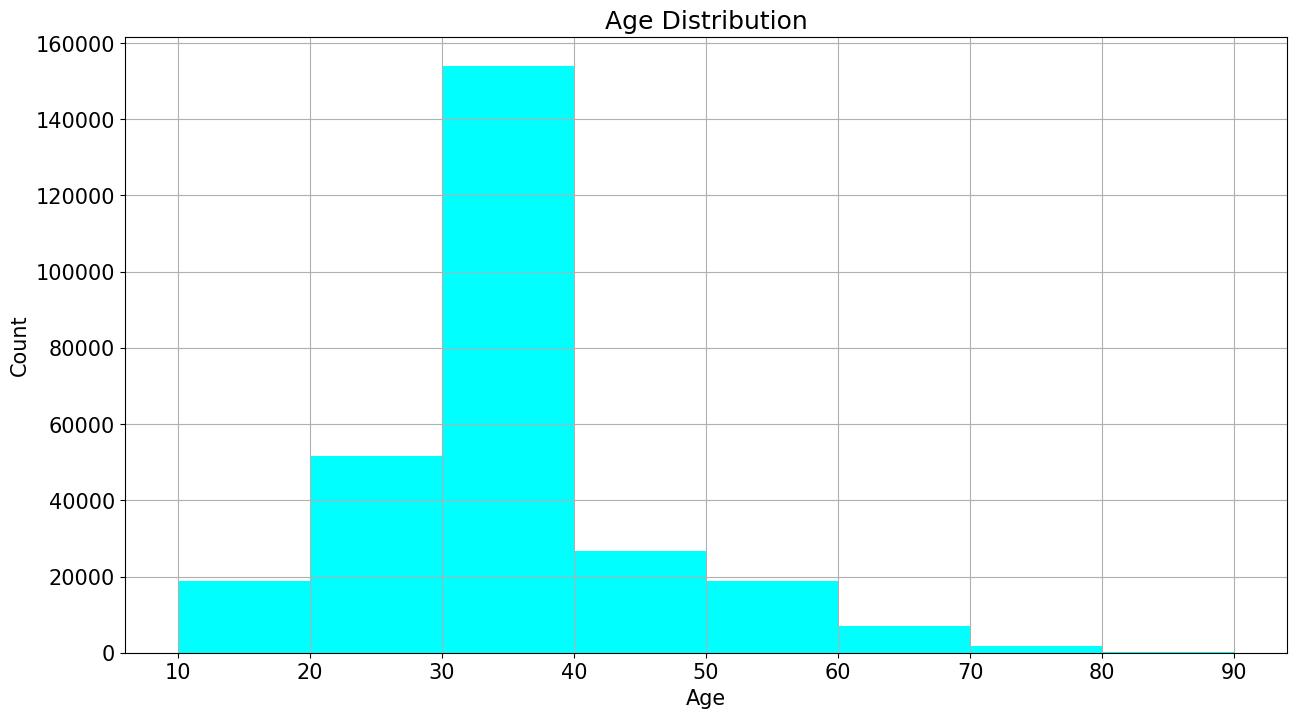

In [49]:
plt.figure(figsize=(15,8))
users_data.Age.hist(bins=[10*i for i in range(1, 10)], color = 'cyan')     
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('visualizations/age_distribution.png')
plt.show()

Looking towards the users age between 30-40 prefer more and somewhat we can also view between 20-30. Let's make some hypothesis analysis:-

- It is obvious that most of the user books are from Age 30 to 40.
- It might happen that the users are more interested on that subject what Authors are publishing in the market.
- The age group between 20-30 are immensely attracted to read books published by Author.
- We can observe same pitch for Age group between 10-20 and 50-60. There are can be lot of different reasons.

-----------------------

## Ratings_data Dataset

#### Analysis No. 5

What are top 20 books as per number of ratings ?

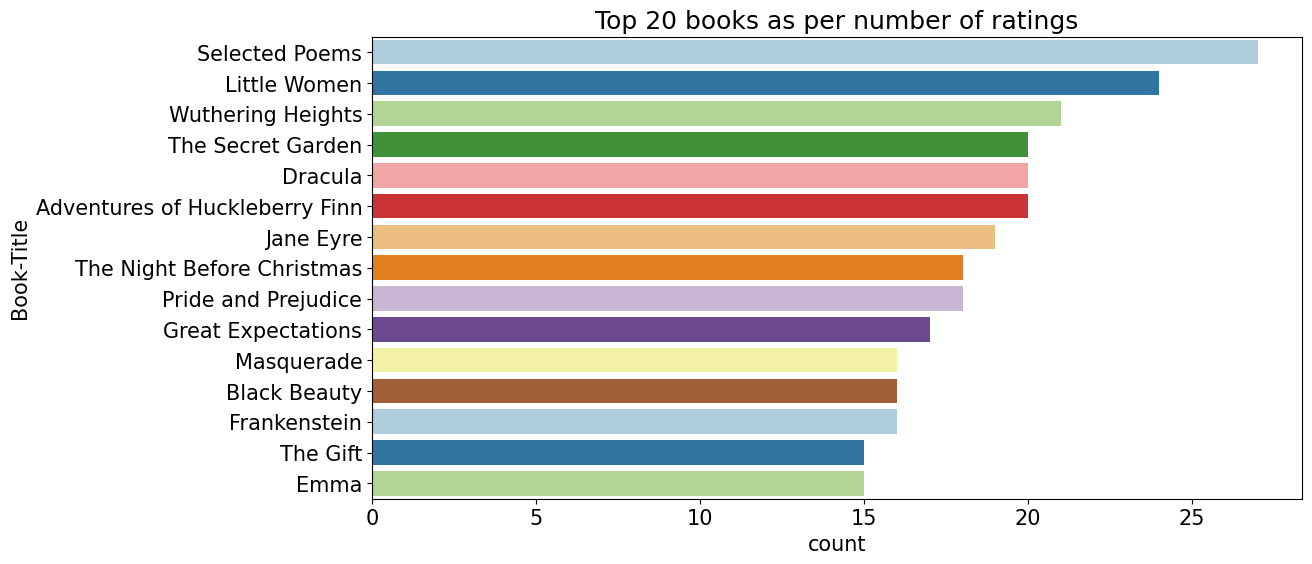

In [50]:
plt.figure(figsize=(12,6))
sns.countplot(y="Book-Title",palette = 'Paired',data= book_data, order=book_data['Book-Title'].value_counts().index[0:15])
plt.title("Top 20 books as per number of ratings")
plt.savefig('visualizations/TOP_20_BOOKS_PER_NUMBER_RATINGS.png')

As per ratings "Selected Poems" has been rated most followed by "Little Women".

- Selected Poems are most favourable to users as per ratings.
- Three of the books 'The Secret Garden', 'Dracula','Adventures of Huckleberry Finn'are struggling to compete with each other. Similarly, we can observe in 'Masquerade','Black Beauty','Frankenstein'.

Text(0.5, 1.0, 'Explicit Ratings')

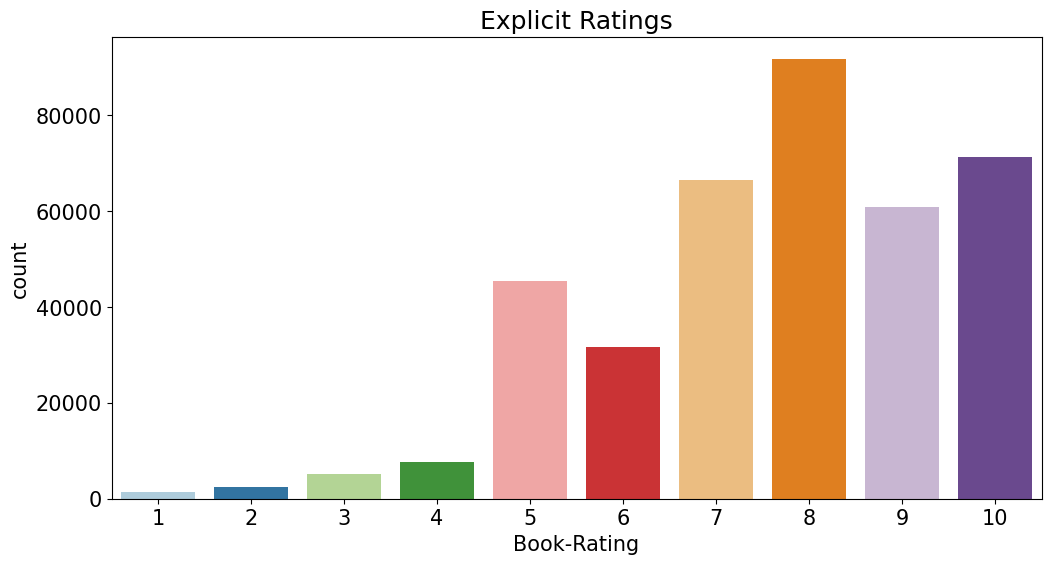

In [53]:
# Explicit Ratings
plt.figure(figsize=(12,6))
rate_data = unique_ratings[unique_ratings['Book-Rating'] != 0]
sns.countplot(x="Book-Rating",palette = 'Paired',data=rate_data)
plt.savefig('visualizations/BOOK_RATINGS.png')
plt.title("Explicit Ratings")

Now this countplot of bookRating indicates that higher ratings are more common amongst users and rating 8 has been rated highest number of times. There can be many assumptions based on ratings of users :-

- Let's take ratings group from 1-4. This can be negative impact for books been published if they have ratings from 1 to 4. It can be issues related to - 1. Language 2. Offend by any chapter's incident/paragraph/Author 3. They've read worst book ever.

- If we think analytical about rating 5, it might happen some same reason as above key points mention.

- For 5 ratings the users might not sure about book ratings whether it's positive or negative impact.

- Let's take ratings group from 6-10. This are positive feedback - 1. It can happen that not every book is perfect in all desire. So, the user's have decided to rate 8.
 2. Since 6 ratings is very low among other ratings. 3. As we can aspect 7 and 8 are average and more ratings from users. 4. 9 and 10 ratings are top best ratings based on Author's, Publisher's and Books been published.

-------------------

# Recommendation System

Now let's try to build recommendation system based on popularity (i.e ratings). This recommendations are usually given to every user irrespective of personal characterization.

We have to separate the explicit ratings represented by 1–10 and implicit ratings represented by 0.

### Popularity Based Recommender System

### Future Extraction

In [54]:
ratings_with_name = ratings_data.merge(book_data,on='ISBN') 

In [55]:
ratings_with_name

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg,NaN
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001.0,Heinle,http://images.amazon.com/images/P/0155061224.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0155061224.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0155061224.01.LZZZZZZZ.jpg,NaN
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996.0,Warner Books,http://images.amazon.com/images/P/0446520802.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0446520802.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0446520802.01.LZZZZZZZ.jpg,NaN
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999.0,Cambridge University Press,http://images.amazon.com/images/P/052165615X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/052165615X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/052165615X.01.LZZZZZZZ.jpg,NaN
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge English Readers),Sue Leather,2001.0,Cambridge University Press,http://images.amazon.com/images/P/0521795028.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0521795028.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0521795028.01.LZZZZZZZ.jpg,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1031131,276704,0876044011,0,Edgar Cayce on the Akashic Records: The Book of Life,Kevin J. Todeschi,1998.0,A.R.E. Press (Association of Research &amp; Enlig,http://images.amazon.com/images/P/0876044011.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0876044011.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0876044011.01.LZZZZZZZ.jpg,NaN
1031132,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the Savvy Consumer,Clark Howard,2000.0,Longstreet Press,http://images.amazon.com/images/P/1563526298.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/1563526298.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/1563526298.01.LZZZZZZZ.jpg,NaN
1031133,276706,0679447156,0,Eight Weeks to Optimum Health: A Proven Program for Taking Full Advantage of Your Body's Natural Healing Power (Proven Program for Taking Full Advantage of Your Body's Natural Healing Power),Andrew Weil,1997.0,Alfred A. Knopf,http://images.amazon.com/images/P/0679447156.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0679447156.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0679447156.01.LZZZZZZZ.jpg,NaN
1031134,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996.0,Jove Books,http://images.amazon.com/images/P/0515107662.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0515107662.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0515107662.01.LZZZZZZZ.jpg,NaN


In [56]:
num_rating_df = ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
num_rating_df

,Book-Title,num_ratings
0,"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, Book 5)",1
4,Beyond IBM: Leadership Marketing and Finance for the 1990s,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [57]:
# Clean the 'Book-Rating' column by removing non-numeric values
ratings_with_name['Book-Rating'] = pd.to_numeric(ratings_with_name['Book-Rating'], errors='coerce')

# Drop rows with NaN (non-convertible values)
ratings_with_name.dropna(subset=['Book-Rating'], inplace=True)

# Calculate the average rating
avg_rating_df = ratings_with_name.groupby('Book-Title')['Book-Rating'].mean().reset_index()
avg_rating_df.rename(columns={'Book-Rating':'avg_rating'},inplace=True)
avg_rating_df

,Book-Title,avg_rating
0,"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, Book 5)",8.000000
4,Beyond IBM: Leadership Marketing and Finance for the 1990s,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [58]:
popular_df = num_rating_df.merge(avg_rating_df,on='Book-Title')
popular_df

,Book-Title,num_ratings,avg_rating
0,"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, Book 5)",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance for the 1990s,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


## Let's take top 50 recommendation books

In [59]:
popular_df = popular_df[popular_df['num_ratings']>=250].sort_values('avg_rating',ascending=False).head(50)

In [60]:
popular_df = popular_df.merge(book_data,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','num_ratings','avg_rating']]

In [61]:
popular_df['Image-URL-M'][0]

'http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg'

In [62]:
popular_df

,Book-Title,Book-Author,Image-URL-M,num_ratings,avg_rating
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.01.MZZZZZZZ.jpg,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.01.MZZZZZZZ.jpg,278,5.737410
9,Harry Potter and the Order of the Phoenix (Book 5),J. K. Rowling,http://images.amazon.com/images/P/043935806X.01.MZZZZZZZ.jpg,347,5.501441
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.01.MZZZZZZZ.jpg,556,5.183453
16,The Hobbit : The Enchanting Prelude to The Lord of the Rings,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339681.01.MZZZZZZZ.jpg,281,5.007117
17,"The Fellowship of the Ring (The Lord of the Rings, Part 1)",J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339703.01.MZZZZZZZ.jpg,368,4.948370
26,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),J. K. Rowling,http://images.amazon.com/images/P/059035342X.01.MZZZZZZZ.jpg,575,4.895652
28,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339711.01.MZZZZZZZ.jpg,260,4.880769
39,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0446310786.01.MZZZZZZZ.jpg,510,4.700000


---------------

### Visualize Average rating per books

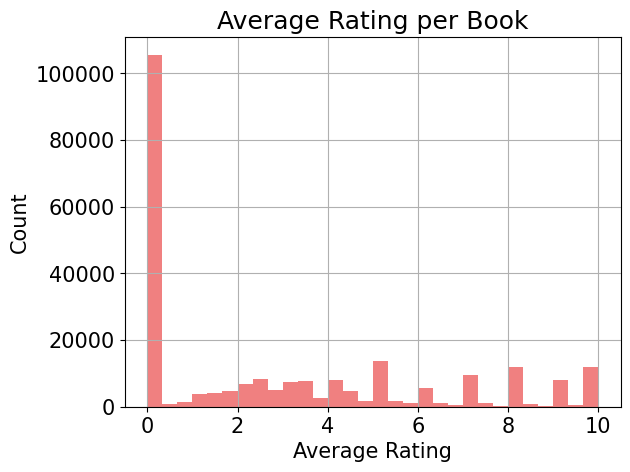

In [63]:
avg_rating_per_book = ratings_with_name.groupby('Book-Title')['Book-Rating'].mean()
avg_rating_per_book.hist(bins=30, color='lightcoral')
plt.title('Average Rating per Book')
plt.xlabel('Average Rating')
plt.ylabel('Count')
plt.savefig('visualizations/average_rating_per_book.png')
plt.show()

---------------------

### Average Rating by Book Title 

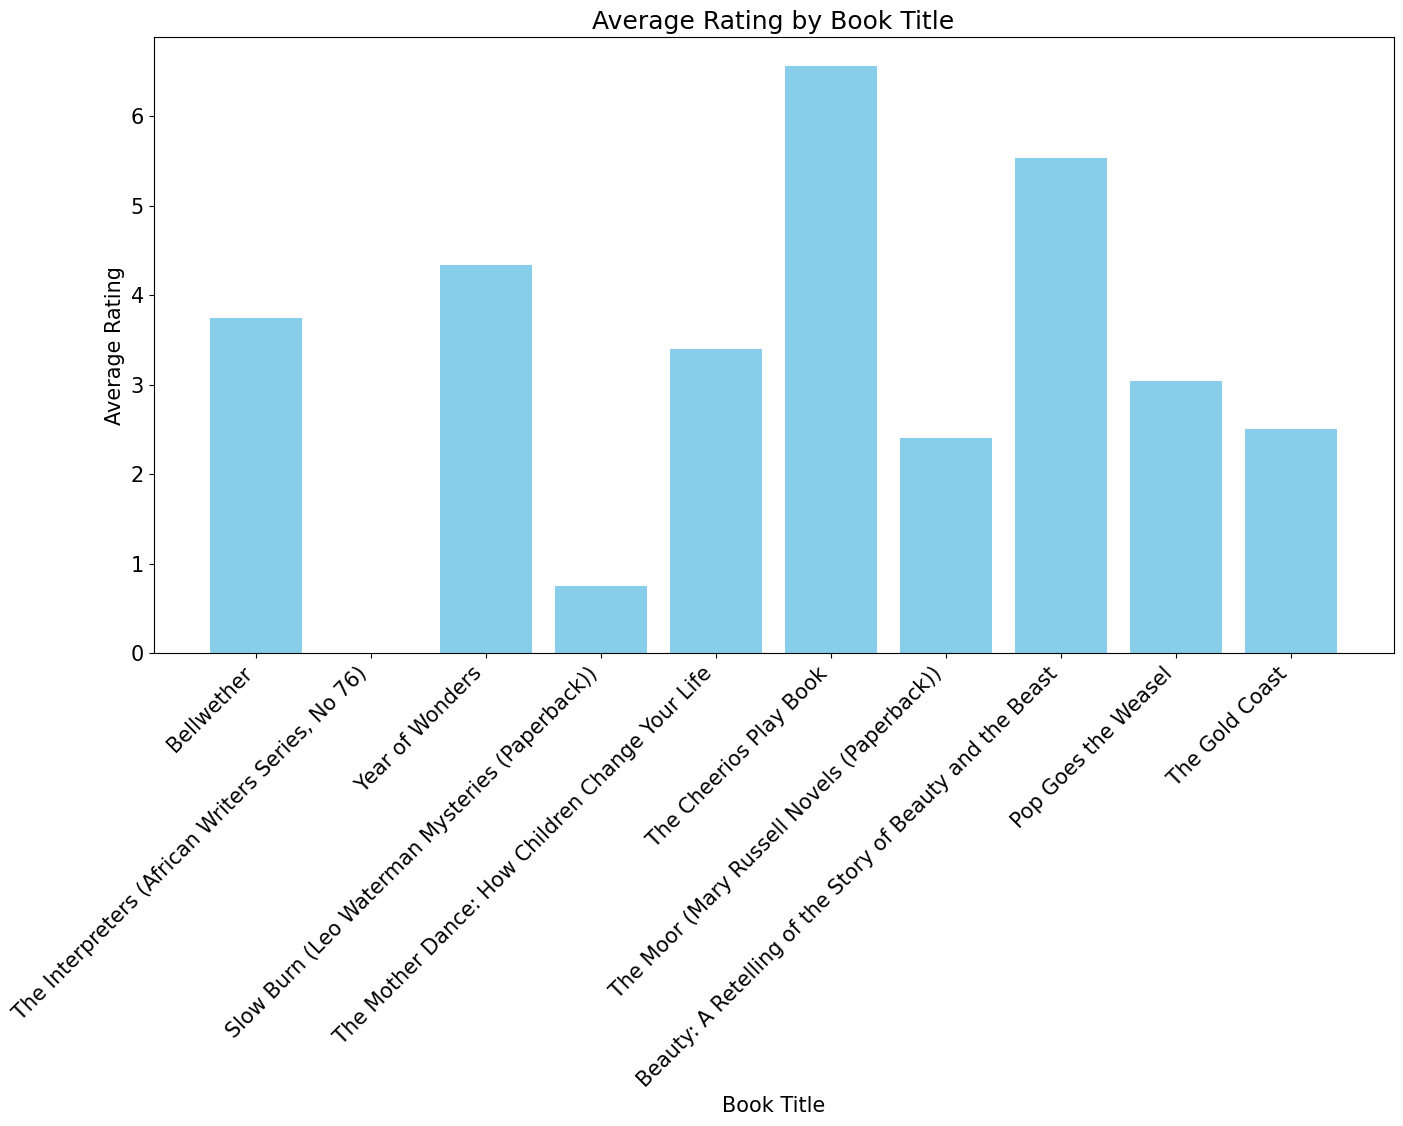

In [64]:
sample_book = ratings_with_name['Book-Title'].sample(10)
average_ratings = [ratings_with_name[ratings_with_name['Book-Title'] == book]['Book-Rating'].mean() for book in sample_book]

plt.figure(figsize=(16, 8))
plt.bar(sample_book, average_ratings, color='skyblue')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Book Title')
plt.ylabel('Average Rating')
plt.title('Average Rating by Book Title')
plt.savefig('visualizations/average_rating_by_book_title.png')

plt.show()

--------------------------

## Collaborative Filtering Based Recommender System

In [65]:
x = ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 200
padhe_likhe_users = x[x].index

In [66]:
x

User-ID
2         False
8         False
9         False
10        False
12        False
          ...  
278846    False
278849    False
278851    False
278852    False
278854    False
Name: Book-Rating, Length: 92106, dtype: bool

In [67]:
filtered_rating = ratings_with_name[ratings_with_name['User-ID'].isin(padhe_likhe_users)]
filtered_rating

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,publisher
1150,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Tales for Our Life and Times,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/002542730X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/002542730X.01.LZZZZZZZ.jpg,NaN
1151,277427,0026217457,0,Vegetarian Times Complete Cookbook,Lucy Moll,1995.0,John Wiley &amp; Sons,http://images.amazon.com/images/P/0026217457.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0026217457.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0026217457.01.LZZZZZZZ.jpg,NaN
1152,277427,003008685X,8,Pioneers,James Fenimore Cooper,1974.0,Thomson Learning,http://images.amazon.com/images/P/003008685X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/003008685X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/003008685X.01.LZZZZZZZ.jpg,NaN
1153,277427,0030615321,0,"Ask for May, Settle for June (A Doonesbury book)",G. B. Trudeau,1982.0,Henry Holt &amp; Co,http://images.amazon.com/images/P/0030615321.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0030615321.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0030615321.01.LZZZZZZZ.jpg,NaN
1154,277427,0060002050,0,On a Wicked Dawn (Cynster Novels),Stephanie Laurens,2002.0,Avon Books,http://images.amazon.com/images/P/0060002050.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060002050.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060002050.01.LZZZZZZZ.jpg,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1029357,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventures of a Mountain Man Wannabe (Capital Discoveries Book),Mike Tougias,2002.0,Capital Books (VA),http://images.amazon.com/images/P/1931868123.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/1931868123.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/1931868123.01.LZZZZZZZ.jpg,NaN
1029358,275970,3411086211,10,Die Biene.,Sybil GrÃ?Â¤fin SchÃ?Â¶nfeldt,1993.0,"Bibliographisches Institut, Mannheim",http://images.amazon.com/images/P/3411086211.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/3411086211.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/3411086211.01.LZZZZZZZ.jpg,NaN
1029359,275970,3829021860,0,The Penis Book,Joseph Cohen,1999.0,Konemann,http://images.amazon.com/images/P/3829021860.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/3829021860.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/3829021860.01.LZZZZZZZ.jpg,NaN
1029360,275970,4770019572,0,Musashi,Eiji Yoshikawa,1995.0,Kodansha International (JPN),http://images.amazon.com/images/P/4770019572.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/4770019572.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/4770019572.01.LZZZZZZZ.jpg,NaN


In [69]:
y = filtered_rating.groupby('Book-Title').count()['Book-Rating']>=50
famous_books = y[y].index

In [70]:
y

Book-Title
 A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)    False
 Always Have Popsicles                                                                                        False
 Apple Magic (The Collector's series)                                                                         False
 Beyond IBM: Leadership Marketing and Finance for the 1990s                                                   False
 Clifford Visita El Hospital (Clifford El Gran Perro Colorado)                                                False
                                                                                                              ...  
Ã?Â?ber das Fernsehen.                                                                                        False
Ã?Â?ber die Pflicht zum Ungehorsam gegen den Staat.                                                           False
Ã?Â?lpiraten.                                                

In [71]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]
final_ratings

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,publisher
1150,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Tales for Our Life and Times,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/002542730X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/002542730X.01.LZZZZZZZ.jpg,NaN
1163,277427,0060930535,0,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999.0,Perennial,http://images.amazon.com/images/P/0060930535.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060930535.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060930535.01.LZZZZZZZ.jpg,NaN
1165,277427,0060934417,0,Bel Canto: A Novel,Ann Patchett,2002.0,Perennial,http://images.amazon.com/images/P/0060934417.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060934417.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060934417.01.LZZZZZZZ.jpg,NaN
1168,277427,0061009059,9,One for the Money (Stephanie Plum Novels (Paperback)),Janet Evanovich,1995.0,HarperTorch,http://images.amazon.com/images/P/0061009059.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0061009059.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0061009059.01.LZZZZZZZ.jpg,NaN
1174,277427,006440188X,0,The Secret Garden,Frances Hodgson Burnett,1998.0,HarperTrophy,http://images.amazon.com/images/P/006440188X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/006440188X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/006440188X.01.LZZZZZZZ.jpg,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1029196,275970,1400031354,0,Tears of the Giraffe (No.1 Ladies Detective Agency),Alexander McCall Smith,2002.0,Anchor,http://images.amazon.com/images/P/1400031354.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/1400031354.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/1400031354.01.LZZZZZZZ.jpg,NaN
1029197,275970,1400031362,0,Morality for Beautiful Girls (No.1 Ladies Detective Agency),Alexander McCall Smith,2002.0,Anchor,http://images.amazon.com/images/P/1400031362.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/1400031362.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/1400031362.01.LZZZZZZZ.jpg,NaN
1029270,275970,1573229725,0,Fingersmith,Sarah Waters,2002.0,Riverhead Books,http://images.amazon.com/images/P/1573229725.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/1573229725.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/1573229725.01.LZZZZZZZ.jpg,NaN
1029309,275970,1586210661,9,Me Talk Pretty One Day,David Sedaris,2001.0,Time Warner Audio Major,http://images.amazon.com/images/P/1586210661.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/1586210661.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/1586210661.01.LZZZZZZZ.jpg,NaN


In [75]:
pt = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [76]:
pt.fillna(0,inplace=True)

In [77]:
pt.head()

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,6563,6575,7158,7286,7346,7915,8067,8245,8681,8936,10447,10819,11601,11676,11993,12538,12824,12982,13082,13273,13552,13850,14422,14521,15408,15418,16106,16634,16795,16916,16966,17950,18067,18401,19085,19664,20115,20201,21014,21252,21576,21659,22625,23288,23768,23872,23902,24194,24921,25409,25601,25981,26516,26535,26544,26583,26593,27617,28204,28360,28523,28591,29259,29855,30276,30487,30511,30533,30711,30735,30972,31315,31391,31556,31826,31846,32195,32440,32721,32773,33974,35050,35836,35857,35859,36606,36609,36836,36907,37567,37712,37950,38023,38273,38781,39281,39467,39616,39646,39773,40889,40943,41084,41841,42914,43246,43806,43842,44595,44728,46398,47316,48494,49109,49460,49889,50225,51094,51350,51386,51450,51883,52199,52584,52614,52853,52917,53174,53628,53729,54218,55187,55490,55492,55548,55734,55892,56271,56399,56447,56856,56959,59172,59971,60244,60277,60337,60707,61619,62272,62891,62895,63394,63714,63938,64436,65258,66680,67840,68555,69042,69078,69232,69355,69405,69697,69808,69971,70052,70415,70594,71712,72352,72992,73394,73651,75591,75860,76151,76223,76352,76499,76626,76818,76942,77809,77940,78553,78783,78834,78973,79186,79441,80538,80683,81045,81492,81560,81977,82407,82831,82893,82926,83637,84024,85426,85526,85656,85701,85757,85993,86202,86243,86641,87141,87143,87555,87746,87974,88283,88677,88693,88733,88937,89602,91203,91342,91832,91931,92547,92652,92810,92979,93047,93085,93363,93629,94242,94347,94853,94923,95193,95316,95359,95903,95932,95991,96054,96448,97874,98391,98741,98758,100459,100644,100846,100906,101209,101851,101876,102275,102647,102702,102967,104399,104429,104636,104665,105374,105517,105979,106225,106816,107021,107301,107453,107784,107951,108005,108285,108352,109461,109574,109955,110029,110483,110912,110934,110973,111174,111947,112001,112026,112881,113270,113519,113817,113904,113983,114178,114368,114414,114444,114868,114988,115002,115003,115120,115490,116599,117251,117539,119575,120093,120548,122429,122793,122881,123790,123883,123981,124078,124079,124363,124487,124942,125039,125519,125692,125774,126492,126604,126736,127200,127233,127359,127429,127914,128696,128835,129008,129074,129358,129465,129716,129851,130474,130554,130571,131027,131046,131402,131837,131855,132083,133571,133689,133747,133868,135045,135149,135265,135458,135831,136010,136139,136205,136252,136382,137589,137688,138097,138441,138578,138844,139467,139742,140000,140036,140358,141493,141710,142093,142524,143175,143253,143415,143792,144531,144555,145449,145451,145619,145641,146113,146230,146348,147141,147451,147847,147965,148199,148258,148744,149069,149907,149908,149934,150124,150498,150968,150979,151790,151806,152186,152249,153563,153662,153718,154992,155014,155147,155219,155495,156150,156269,156467,157273,157811,158295,159033,159376,159858,160032,160819,161752,162052,162639,162738,163804,163973,164027,164323,164465,164533,164675,164828,165232,165308,165319,166123,166596,167349,167471,167800,168047,168064,168144,168245,169233,169663,169699,170229,170513,170518,170575,170634,170742,170947,171118,172030,172512,172742,173291,173415,173632,173684,173835,174216,174304,174791,175003,175886,177072,177090,177374,177432,177458,177690,178181,178199,178667,178950,179733,179744,179772,179978,180348,180586,180651,180917,180957,181176,181687,182085,182086,182987,182993,183196,183995,184299,185233,185384,186570,187145,187256,187517,188010,189334,189516,189835,189973,190459,190708,190807,190925,191187,192093,193499,193560,194600,194669,195694,196047,196077,196160,196457,196502,197364,197659,197775,198621,198699,198711,199416,199772,200226,200674,201017,201290,201447,201526,201674,201768,201783,203240,203799,203968,204167,204522,204591,204864,205473,205735,205980,206074,206534,206567,206979,207246,207349,207499,207782,208141,208147,208406,208410,208568,208671,208829,209373,209516,209756,209875,210035,210485,210792,210959,211426,211430,211847,211919,212645,212898,212923,212965,213150,213350,214272,214786,216012

------------------------------------

## Cosine Similarity Based Recommendation System

In [78]:
from sklearn.metrics.pairwise import cosine_similarity

In [79]:
similarity_scores = cosine_similarity(pt)

In [80]:
def recommend(book_name):
    # Check if the book exists in the pivot table
    if book_name not in pt.index:
        print("Book not found in the dataset.")
        return
    
    # index fetch
    index = np.where(pt.index == book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])), key=lambda x: x[1], reverse=True)[1:5]
    
    data = []
    for i in similar_items:
        item = []
        temp_df = book_data[book_data['Book-Title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
        
        data.append(item)
    
    return data


-----------------------------------------------------

## Feature Testing

In [81]:
recommend('Angus, Thongs and Full-Frontal Snogging: Confessions of Georgia Nicolson')

[['The Bad Beginning (A Series of Unfortunate Events, Book 1)',
  'Lemony Snicket',
  'http://images.amazon.com/images/P/0064407667.01.MZZZZZZZ.jpg'],
 ['Wicked: The Life and Times of the Wicked Witch of the West',
  'Gregory Maguire',
  'http://images.amazon.com/images/P/0060987103.01.MZZZZZZZ.jpg'],
 ['Animal Farm',
  'George Orwell',
  'http://images.amazon.com/images/P/0451526341.01.MZZZZZZZ.jpg'],
 ['Confessions of an Ugly Stepsister : A Novel',
  'Gregory Maguire',
  'http://images.amazon.com/images/P/0060987529.01.MZZZZZZZ.jpg']]

-------------------------

## Evaluation Metrics 

In [82]:
from sklearn.metrics import mean_squared_error
from math import sqrt

predictions = pt.copy() 

# Flatten the data
actual_ratings = pt.values.flatten()
predicted_ratings = predictions.values.flatten()

# Filter out zero entries, which represent missing ratings
non_zero_indices = actual_ratings.nonzero()

# Calculate RMSE
rmse = sqrt(mean_squared_error(actual_ratings[non_zero_indices], predicted_ratings[non_zero_indices]))
print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 0.0


-------------------------------

## Model Deployment

In [83]:
# import pickle
# pickle.dump(popular_df,open('models/popular.pkl','wb'))

In [84]:
# pickle.dump(pt,open('models/pt.pkl','wb'))
# pickle.dump(book_data,open('models/books.pkl','wb'))
# pickle.dump(similarity_scores,open('models/similarity_scores.pkl','wb'))

# print('Successfully Saved or Deployed This Model')

---------------------

## END-PROJECT